In [11]:
import torch
import numpy as np
import pandas as pd
import os
import random
from IPython.display import Image
from scipy.special import softmax
np.set_printoptions(suppress=True)

In [12]:
numpy_data_path = "../../Training-baseline/"
image_data_path = "../../Pokemon-data/"

model = torch.load("./saved-models/20Epochs-freeze.pt")
model = model.cpu()
model.eval()

metadata = pd.read_csv('metadata/pokemon.csv')

filtered_metadata = metadata.loc[:,['name', 'type1']]
filtered_metadata.type1 = pd.Categorical(filtered_metadata.type1)
filtered_metadata['code'] = filtered_metadata.type1.cat.codes
filtered_metadata = filtered_metadata[["type1", "code"]].drop_duplicates()

In [13]:
def extract_type(idx):
    return filtered_metadata[filtered_metadata["code"] == idx]["type1"].values[0]

In [14]:
def make_prediction(name):
    numpy_files = os.listdir(numpy_data_path+name)
    image_files = os.listdir(image_data_path+name)
    file_idx = random.choice(list(enumerate(numpy_files)))[0]
    display(Image(filename=image_data_path+name+"/"+image_files[file_idx], width = 500, height = 300))
    image_array = np.load(numpy_data_path+name+"/"+numpy_files[file_idx])[:,:,:3]
    data = image_array.astype(np.float32)
    
    data = data.transpose()
    data = data[None,:,:,:]
    data = torch.tensor(data, dtype=torch.float)
    prediction = model(data).detach().numpy()[0]

    confident_idx = np.argmax(prediction)
    print(f"Model predicted: {extract_type(confident_idx)}")
    prediction = [(extract_type(idx), single_prediction) for idx, single_prediction in enumerate((softmax(prediction)*100))]
    prediction.sort(key=lambda x: x[1], reverse=True)
    prediction = [f"{single_prediction[0]}: {single_prediction[1]:.2f}%" for single_prediction in prediction]
    
    for idx, single_prediction in enumerate(prediction):
        print(single_prediction, end='\t')
        if (idx + 1) % 6 == 0:
            print("")

Gewünschte Pokemon in der test_pokemon_list hinzufügen (in Englisch, mehrfach auflisten ist möglich)

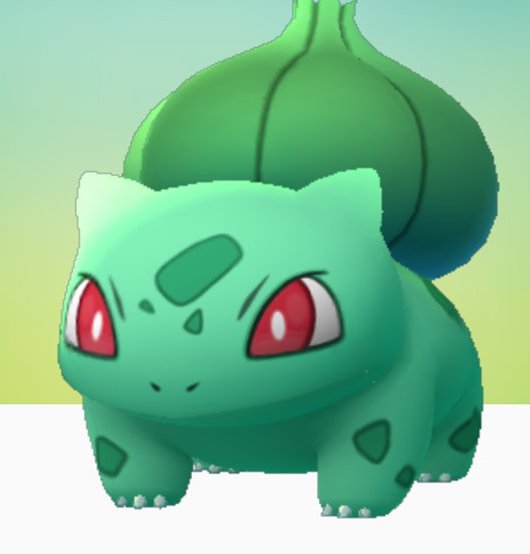

Model predicted: grass
grass: 99.55%	normal: 0.39%	fire: 0.03%	water: 0.01%	rock: 0.01%	bug: 0.01%	
poison: 0.00%	fighting: 0.00%	ice: 0.00%	psychic: 0.00%	ground: 0.00%	fairy: 0.00%	
dragon: 0.00%	dark: 0.00%	steel: 0.00%	electric: 0.00%	ghost: 0.00%	flying: 0.00%	


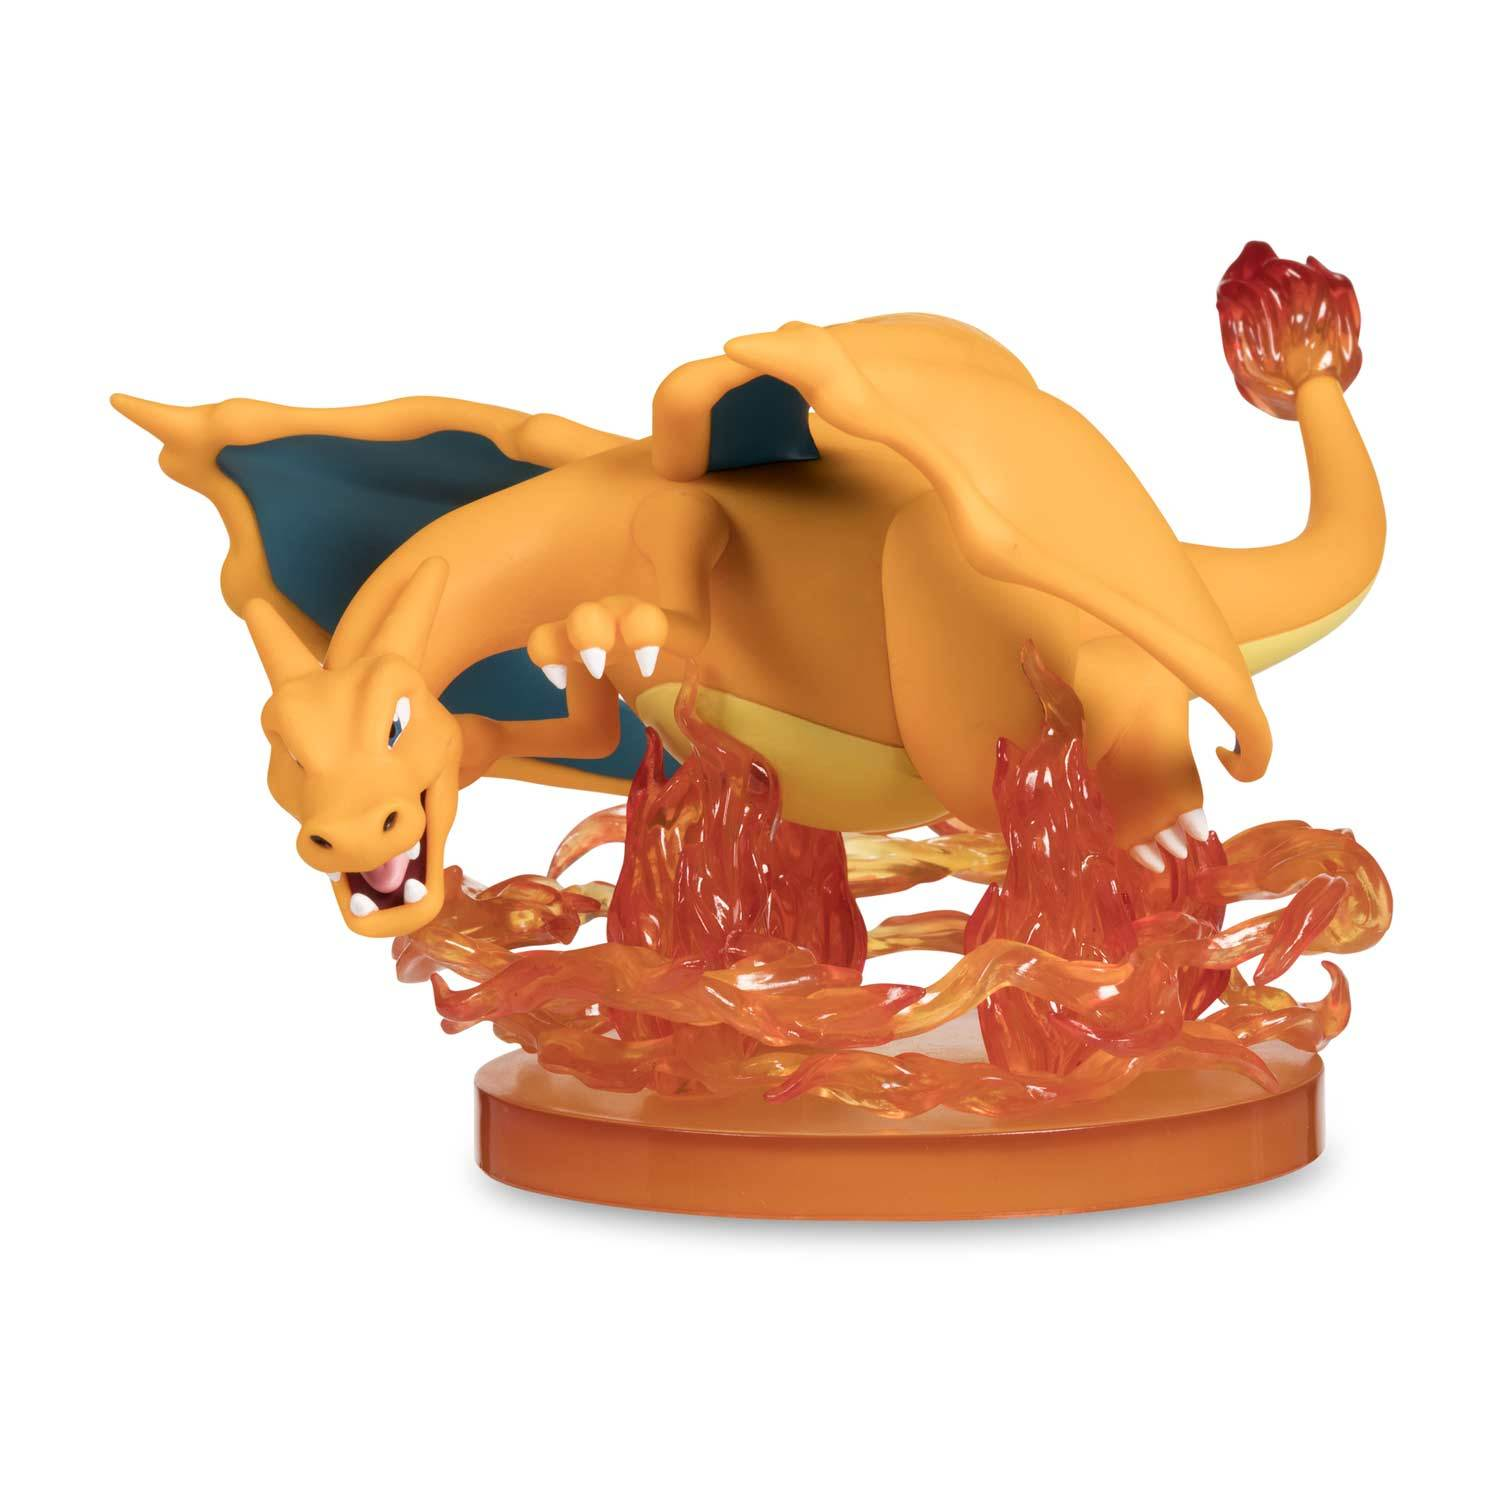

Model predicted: water
water: 49.35%	dragon: 22.32%	fire: 10.83%	normal: 6.49%	fairy: 5.08%	dark: 1.64%	
bug: 1.35%	psychic: 1.06%	fighting: 0.55%	electric: 0.41%	ground: 0.32%	steel: 0.30%	
rock: 0.15%	ice: 0.07%	grass: 0.06%	poison: 0.01%	flying: 0.00%	ghost: 0.00%	


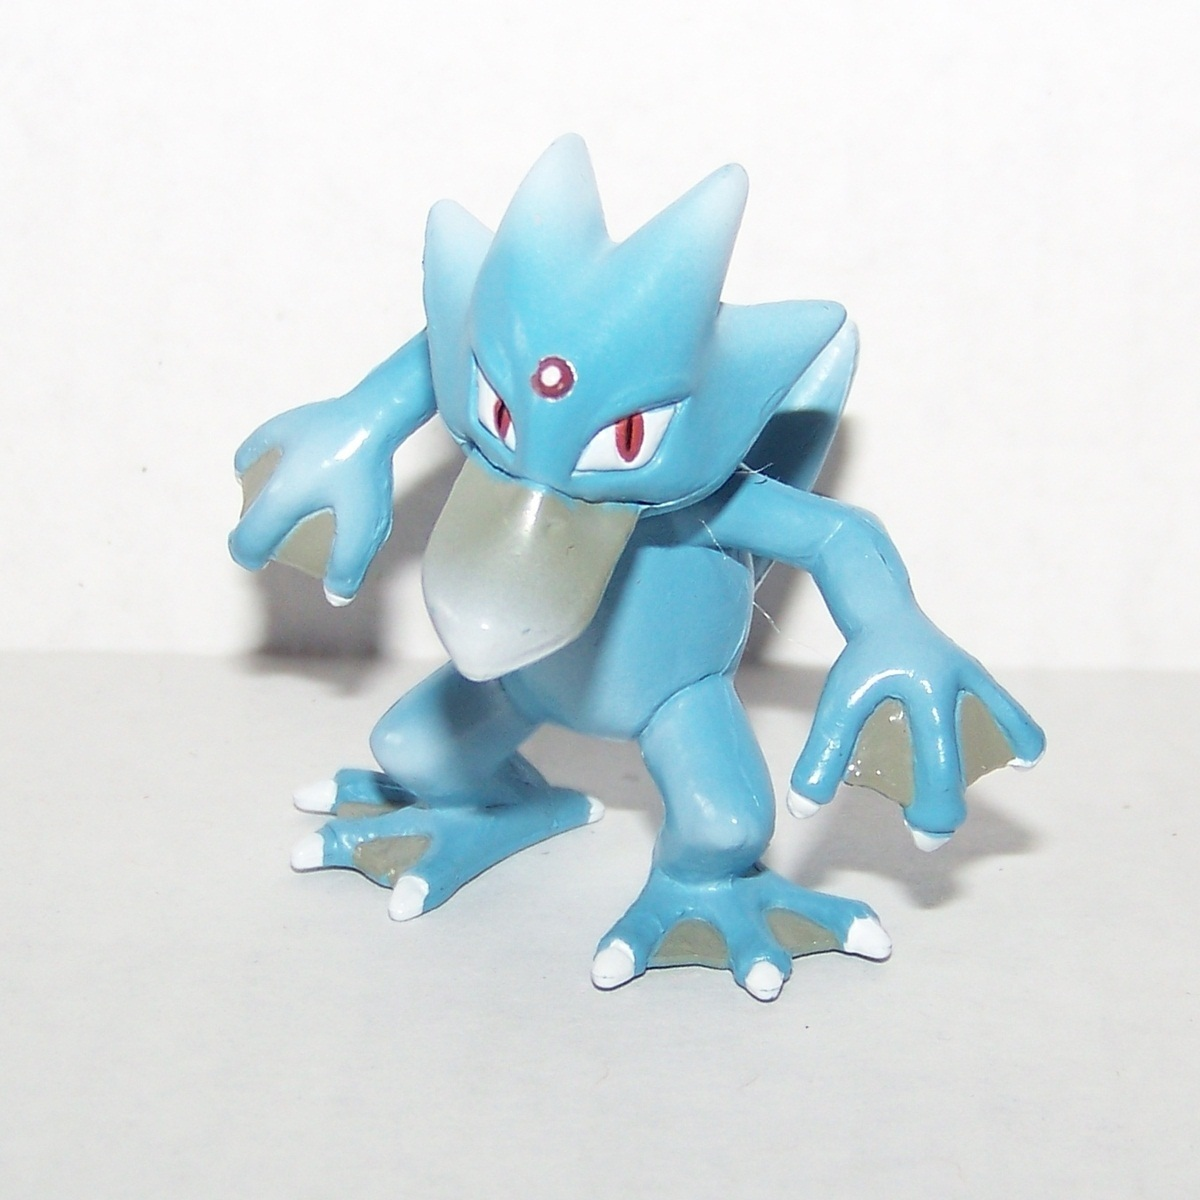

Model predicted: water
water: 82.55%	poison: 6.30%	dragon: 2.27%	dark: 1.79%	normal: 1.60%	psychic: 1.59%	
fire: 1.24%	rock: 0.77%	fighting: 0.70%	fairy: 0.67%	ground: 0.24%	ice: 0.12%	
electric: 0.09%	ghost: 0.03%	bug: 0.02%	flying: 0.00%	steel: 0.00%	grass: 0.00%	


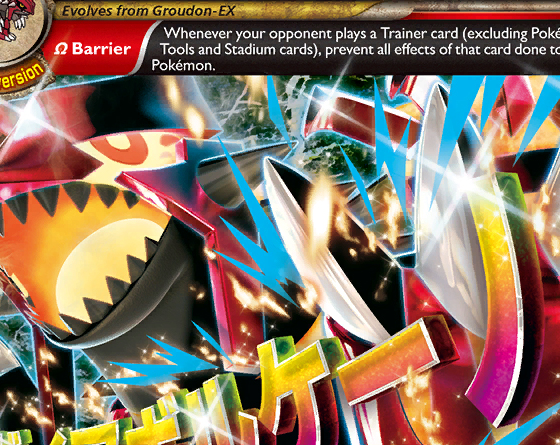

Model predicted: electric
electric: 66.23%	normal: 10.96%	fire: 7.71%	ground: 5.95%	dark: 3.91%	fighting: 3.11%	
bug: 0.75%	psychic: 0.47%	rock: 0.33%	grass: 0.16%	water: 0.12%	ghost: 0.10%	
dragon: 0.09%	poison: 0.04%	ice: 0.03%	flying: 0.02%	steel: 0.02%	fairy: 0.01%	


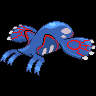

Model predicted: water
water: 93.97%	dragon: 4.35%	rock: 0.47%	fighting: 0.37%	electric: 0.21%	normal: 0.14%	
psychic: 0.11%	steel: 0.11%	bug: 0.10%	dark: 0.07%	ground: 0.06%	fire: 0.02%	
ice: 0.01%	poison: 0.01%	fairy: 0.00%	ghost: 0.00%	grass: 0.00%	flying: 0.00%	


In [19]:
test_pokemon_list = ["Bulbasaur", "Charizard", "Golduck", "Groudon", "Kyogre"]
for pokemon in test_pokemon_list:
    make_prediction(pokemon)